# ***Diamond Market Analysis Assignment***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set_style("whitegrid")
#can also be - sns.set_theme(style="whitegrid")

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df=sns.load_dataset('diamonds')

### *1. Clean and preprocess a structured dataset*

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.shape

(53940, 10)

In [11]:
duplicates=df[df.duplicated()]
duplicates

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [12]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:

df['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [16]:
invalid_dims = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
print(len(invalid_dims))

19


In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(53794, 10)

In [19]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
invalid_dims = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
len(invalid_dims)

19

In [21]:
df = df[~((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### *2. Use group-based aggregation to extract insights*

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
#Grouping by cut
price_by_cut=df.groupby('cut', observed=False)['price'].agg(['max', 'min', 'mean', 'count']).sort_values('max', ascending=False)
price_by_cut.round(2)

,max,min,mean,count
cut,,,,
Premium,18823,326,4578.91,13737
Very Good,18818,336,3980.92,12068
Ideal,18806,326,3462.15,21485
Good,18707,327,3916.28,4888
Fair,18574,337,4340.68,1597


**Premium Cut** diamonds have the **highest average price** (~$4,578.91) despite not being the highest cut grade—this may be due to higher carat weights or other premium features.

**Ideal Cut** is the **most frequently occurring** cut (21,485 diamonds), but its average price is lower than Premium and Fair—possibly due to smaller carats or mass production.

**Fair Cut** has **few diamonds** (only 1,597), but the **average price is higher** than Ideal and Very Good, indicating some expensive outliers.

**Price is not strictly increasing with better cut** — suggesting **other features (carat, clarity, color)** influence price alongside cut.

- While Ideal cut is most common, Premium cut has the highest average price, and Fair cut—despite being the least common—has surprisingly high mean prices. This reinforces that diamond price is influenced by a mix of characteristics, not just cut quality.

In [24]:
#Grouping by clarity
price_by_clarity=df.groupby('clarity', observed=False)['price'].agg(['max', 'min', 'mean', 'count']).sort_values('max', ascending=False)
price_by_clarity.round(2)

,max,min,mean,count
clarity,,,,
VS2,18823,334,3925.61,12225
SI1,18818,326,3994.27,13030
IF,18806,369,2870.57,1784
SI2,18804,326,5054.53,9142
VS1,18795,327,3841.30,8155
VVS1,18777,336,2522.99,3646
VVS2,18768,336,3286.53,5056
I1,18531,345,3927.30,737


**SI2 (Slightly Included 2)**
- Has the highest mean price ($5,054.53).
- Possibly due to larger carat sizes despite lower clarity.

**IF, VVS1, VVS2**
- These high-clarity diamonds have lower mean prices.
- Implies clarity alone doesn’t determine price.

**I1 (Included)**
- Lowest clarity, but has surprisingly high mean price.
- Possibly due to larger size or rarity in the dataset (only 737 diamonds).

Key Takeaways
- SI1 and SI2 are most common and among the most expensive.
- Better clarity ≠ higher price.
- Price is likely driven more by carat size, cut, or market preference than clarity alone.

In [25]:
price_by_color=df.groupby('color',observed=False)['price'].agg(['max','min','mean','count']).sort_values('mean',ascending=False)
price_by_color.round(2)

,max,min,mean,count
color,,,,
J,18710,335,5326.42,2802
I,18823,334,5079.84,5406
H,18803,337,4477.10,8266
G,18818,354,3999.09,11254
F,18791,342,3726.78,9517
D,18693,357,3172.59,6754
E,18731,326,3079.61,9776


**Higher Color Grade ≠ Higher Price**
- Surprisingly, lower color grades (like J and I) have higher average prices than the higher grades (D and E). This could be because they might be larger or of better cut/clarity, boosting their price despite color.

**Average Price Decreases from J to E/D**
- The mean price generally decreases as color improves from J to D — indicating color alone doesn't determine price.

**Most Common Colors**
- G, E, and F have the highest count, meaning they're more commonly available in the dataset.

This table reveals that diamond price is not solely determined by color. Instead, a combination of cut, clarity, carat, and other features affects pricing. Color J diamonds, though lower in color quality, can have high prices due to other superior attributes.

### *3. Visualize relationships between multiple features*

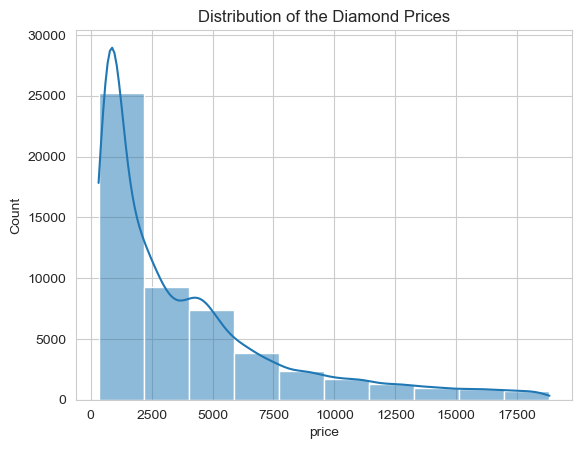

In [26]:
#Distribution of the Diamond Prices 
sns.histplot(data=df,x='price', kde=True ,bins=10)
plt.title('Distribution of the Diamond Prices')
plt.savefig('Distribution of the Diamond Prices.png', dpi=300)
plt.show()

**Right-Skewed Distribution (Positively Skewed)**
- Most diamonds are low-priced, clustered towards the left (under 2,500 USD).
- A few diamonds are very expensive, causing a long tail on the right.
 
**The majority of Diamonds Are Affordable**
- Over 25,000 diamonds are priced below 2,500 USD.
- The count drops sharply as the price increases.

**Rare Expensive Diamonds**
- Diamonds priced above 10,000 USD are relatively rare.

The diamond market (in this dataset) is dominated by lower-priced diamonds.

In [27]:
bins = [0.2, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.2]
labels = ['0.2–0.5', '0.5–1.0', '1.0–1.5', '1.5–2.0', '2.0–3.0', '3.0–4.0', '4.0–5.2']
df = df.copy()
df['carat_range'] = pd.cut(df['carat'], bins=bins, labels=labels, include_lowest=True)
df['carat_range']

0        0.2–0.5
1        0.2–0.5
2        0.2–0.5
3        0.2–0.5
4        0.2–0.5
          ...   
53935    0.5–1.0
53936    0.5–1.0
53937    0.5–1.0
53938    0.5–1.0
53939    0.5–1.0
Name: carat_range, Length: 53775, dtype: category
Categories (7, object): ['0.2–0.5' < '0.5–1.0' < '1.0–1.5' < '1.5–2.0' < '2.0–3.0' < '3.0–4.0' < '4.0–5.2']

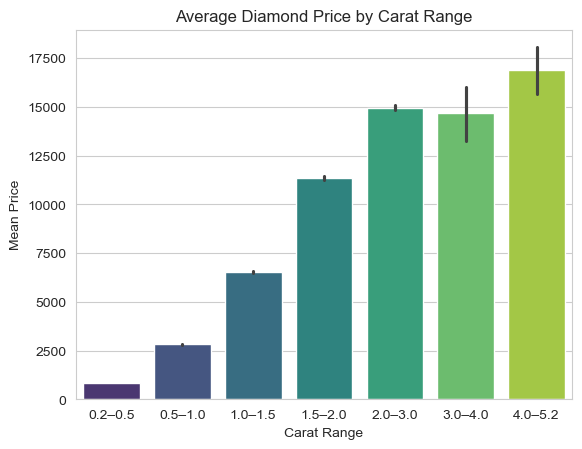

In [28]:
sns.barplot(x='carat_range', y='price', data=df, estimator='mean', palette='viridis', hue='carat_range', legend=False)
plt.title('Average Diamond Price by Carat Range')
plt.xlabel('Carat Range')
plt.ylabel('Mean Price')
plt.savefig('Average Diamond Price by Carat Range.png', dpi=300)
plt.show()

The plot reveals a significant relationship between carat and price. As the carat range increases, the average diamond price rises noticeably. This indicates that diamonds with higher carat weights tend to be significantly more expensive. The trend suggests that larger diamonds are more valuable, and the price increase becomes more pronounced in the higher carat ranges, reflecting their rarity and market demand.

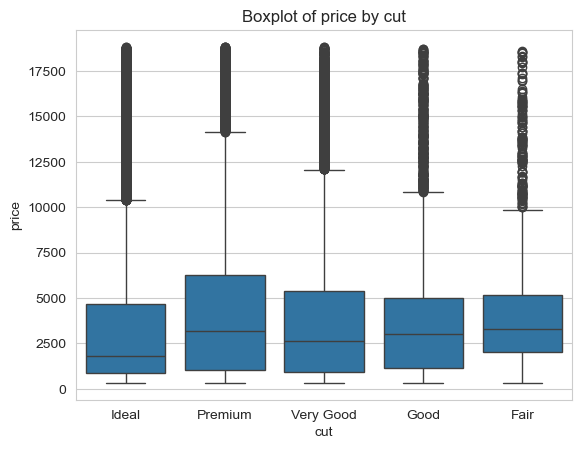

In [29]:
sns.boxplot(data=df,x='cut',y='price')
plt.title('Boxplot of price by cut')
plt.savefig('Boxplot of price by cut.png', dpi=300)
plt.show()

In the observation, we can see high outliers across all cut types, indicating a wide range of prices. Interestingly, Ideal cut, which is considered the best quality, shows the lowest concentration of high price values. This highlights that cut alone is not the only factor influencing price — other factors like carat weight, clarity, and color also play a significant role. As a result, even a Fair cut diamond can have higher prices than an Ideal one when combined with other valuable attributes.

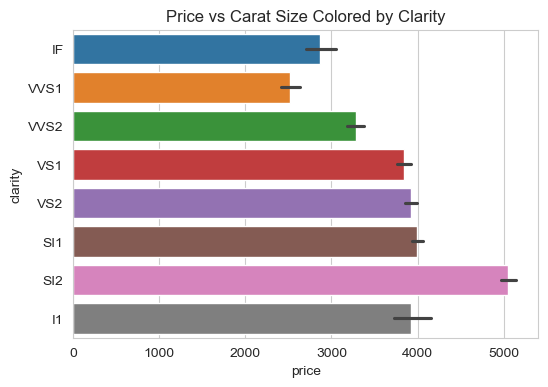

In [30]:
# Ditribution of price by the clarity
plt.figure(figsize=(6, 4))
sns.barplot(x='price', y='clarity', data=df,hue='clarity')
plt.title("Price vs Carat Size Colored by Clarity")
plt.savefig('Price vs Carat Size Colored by Clarity.png', dpi=300)
plt.show()

While the clarity levels are arranged from the most clear to the least, the pricing trend does not strictly follow this order. Interestingly, a lower clarity level (such as SI2) shows the highest average price. This indicates that clarity alone does not determine diamond price — factors like carat size, cut quality, and color significantly influence the final value.

In [31]:
df['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

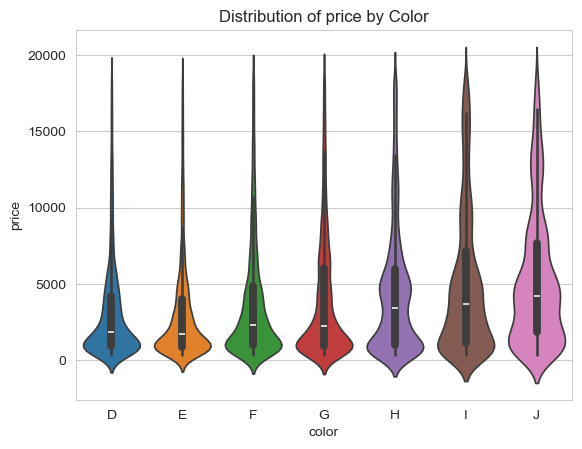

In [32]:
sns.violinplot(data=df,x='color',y='price',hue='color')
plt.title('Distribution of price by Color')
plt.savefig('Distribution of price by Color.png', dpi=300)
plt.show()

Colors like J and I generally have higher prices (wider boxes and higher medians). Also, there are lots of outliers in all categories, especially towards higher prices. We can as well observe that colors D, E, F diamonds tend to be cheaper.

Trend as Price Increases:

- Across all color grades, the violin shapes narrow significantly at higher prices (e.g., above Ksh 13,000 to 20,000), indicating that expensive diamonds are much less common in the dataset.
- The density is concentrated at the bottom of each violin, confirming that affordable diamonds are the majority in all color categories.

Insights:

- High-quality colors (like D) may be less available or purchased less frequently, even if they tend to be more expensive.
- Lower-quality colors (like J) are more common, especially at lower price points, possibly due to higher demand for affordable options.
- The market is skewed towards affordability, with very few diamonds reaching very high prices.

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_range
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.2–0.5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.2–0.5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.2–0.5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.2–0.5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.2–0.5


### *4. Detect outliers, skewed distributions, and multicollinearity*

In [34]:
#Outlier detection for depth using Standard Deviation
mean_value1 = df['depth'].mean()
std_dev1 = df['depth'].std()

lower_bound1 = mean_value1 - 3 * std_dev1
upper_bound1 = mean_value1 + 3 * std_dev1

Outliers1 = df[(df['depth'] < lower_bound1) | (df['depth'] > upper_bound1)]
len(Outliers1)

681

In [35]:
#Outlier detection for table using ZScore
from scipy import stats
df['table'] = stats.zscore(df['table'])

Outliers2 = df[(df['table'] > 3) | (df['table'] < -3)]
len(Outliers2)

334

In [36]:
#Outlier detection for price using IQR
Q1_tip=df['price'].quantile(0.25)
Q3_tip=df['price'].quantile(0.75)
IQR_tip=Q3_tip-Q1_tip

upper_bound2=Q3_tip+1.5*IQR_tip
lower_bound2=Q1_tip-1.5*IQR_tip

#detection
Outliers3=df[(df['price']>upper_bound2) | (df['price']<lower_bound2)]
len(Outliers3)

3520

In [37]:
#Outlier detection for carat using Standard Deviation
mean_value2 = df['carat'].mean()
std_dev2 = df['carat'].std()

lower_bound3 = mean_value2 - 3 * std_dev2
upper_bound3 = mean_value2 + 3 * std_dev2

Outliers4 = df[(df['carat'] < lower_bound3) | (df['carat'] > upper_bound3)]
len(Outliers4)

429

In [38]:
#Outlier removal
Non_outliers_1=df[(df['depth'] >= lower_bound1) & (df['depth'] <= upper_bound1)]
Non_outliers_2=df[(df['table'] <= 3) & (df['table'] >= -3)]
Non_outliers_3=df[(df['price'] <= upper_bound2) & (df['price'] >= lower_bound2)]
Non_outliers_4=df[(df['carat'] >= lower_bound3) & (df['carat'] <= upper_bound3)]

Non_outliers = [Non_outliers_1, Non_outliers_2, Non_outliers_3, Non_outliers_4]
[len(df) for df in Non_outliers]

[53094, 53441, 50255, 53346]

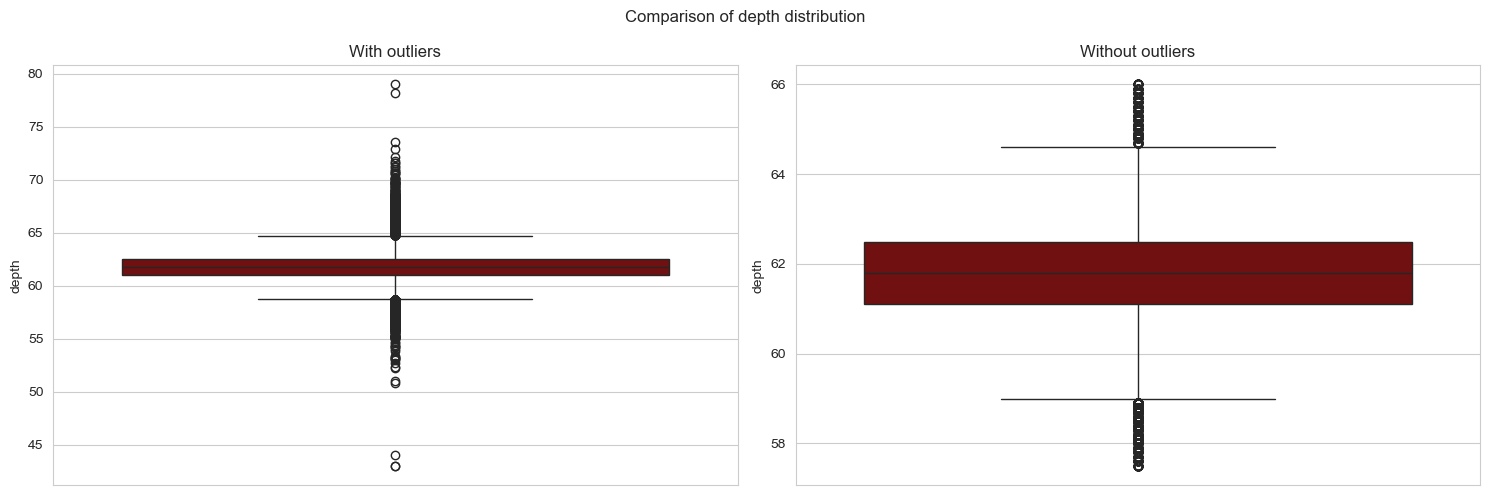

In [39]:
#Visualization to compare numerical data before and after outliers removal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Comparison of depth distribution")

#DataFrame with outliers
sns.boxplot(y=df['depth'], ax=axes[0], color='maroon')
axes[0].set_title('With outliers')

#DataFrame without outliers
sns.boxplot(y=Non_outliers_1['depth'], ax=axes[1], color='maroon')
axes[1].set_title('Without outliers')

plt.tight_layout()
plt.savefig('Comparison of depth distribution.png', dpi=300)
plt.show()

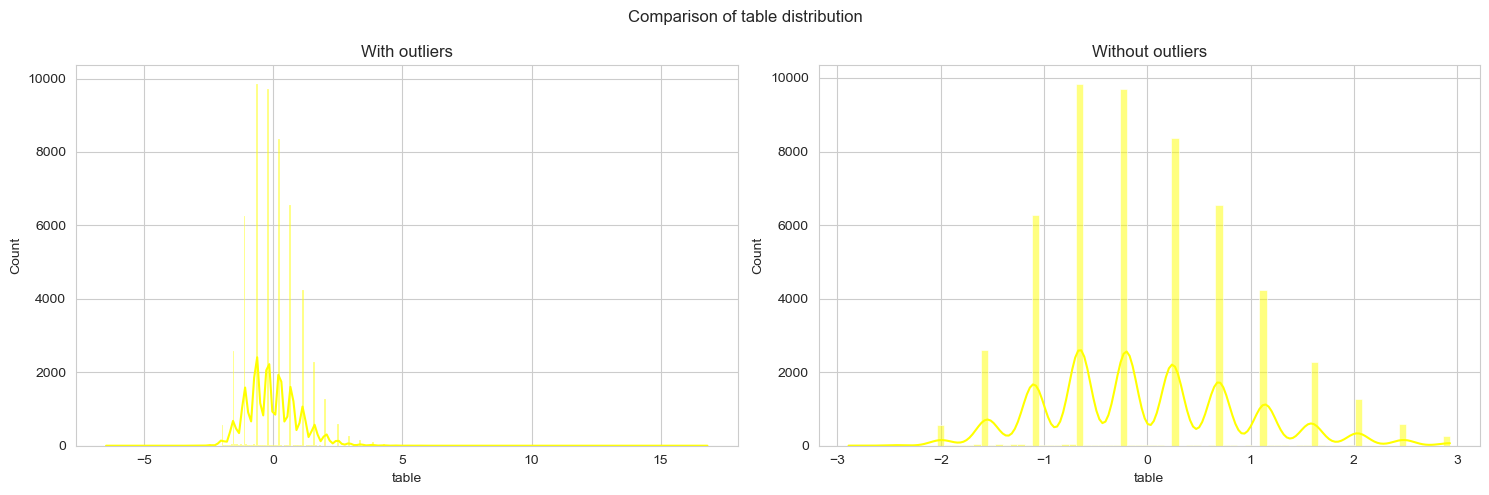

In [40]:
#Visualization to compare numerical data before and after outliers removal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Comparison of table distribution")
#DataFrame with outliers

sns.histplot(x=df['table'], ax=axes[0], color='yellow', kde=True)
axes[0].set_title('With outliers')

#DataFrame without outliers
sns.histplot(x=Non_outliers_2['table'], ax=axes[1], color='yellow', kde=True)
axes[1].set_title('Without outliers')

plt.tight_layout()
plt.savefig('Comparison of table distribution.png', dpi=300)
plt.show()

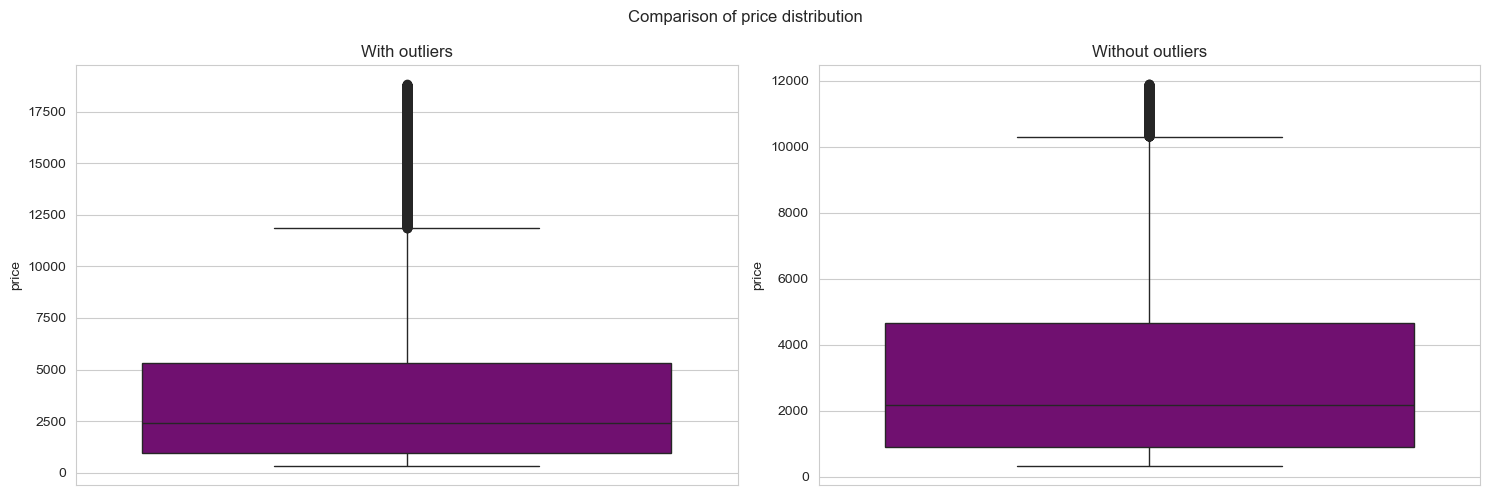

In [41]:
#Visualization to compare numerical data before and after outliers removal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Comparison of price distribution")

#DataFrame with outliers
sns.boxplot(y=df['price'], ax=axes[0], color='purple')
axes[0].set_title('With outliers')

#DataFrame without outliers
sns.boxplot(y=Non_outliers_3['price'], ax=axes[1], color='purple')
axes[1].set_title('Without outliers')

plt.tight_layout()
plt.savefig('Comparison of price distribution.png', dpi=300)
plt.show()

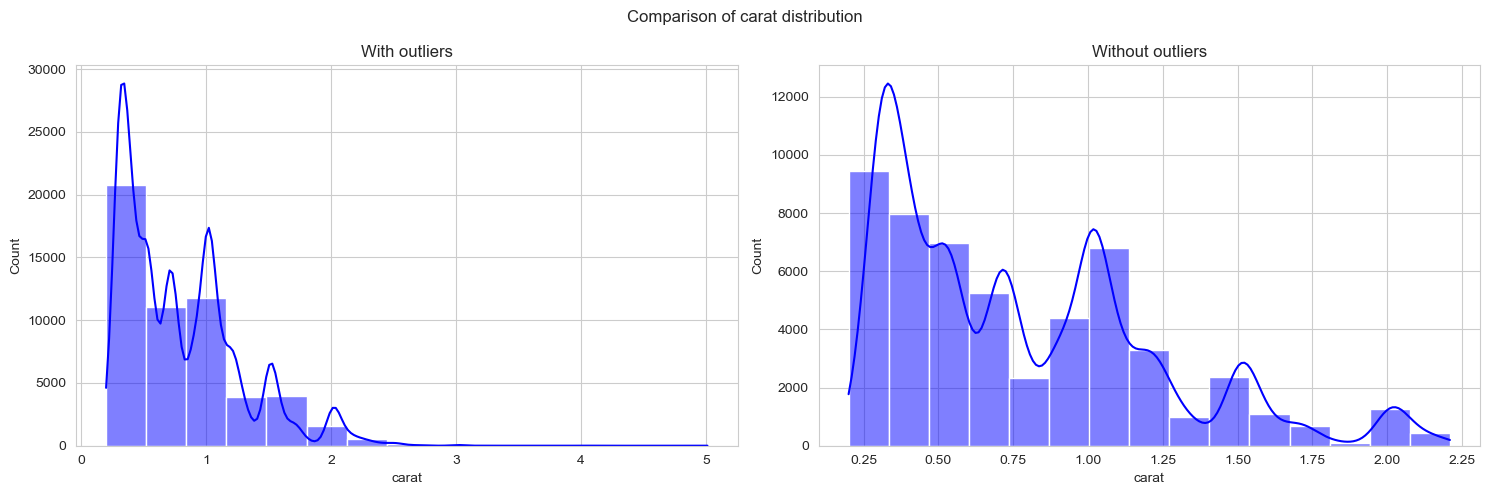

In [42]:
#Visualization to compare numerical data before and after outliers removal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle("Comparison of carat distribution")

#DataFrame with outliers

sns.histplot(x=df['carat'], ax=axes[0], bins=15, color='blue', kde=True)
axes[0].set_title('With outliers')

#DataFrame without outliers
sns.histplot(x=Non_outliers_4['carat'], ax=axes[1], bins=15, color='blue', kde=True)
axes[1].set_title('Without outliers')

plt.tight_layout()
plt.savefig('Comparison of carat distribution.png', dpi=300)
plt.show()

In [43]:
#Multicollinearity
df.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.027889,0.181113,0.921548,0.977857,0.953980,0.961030
depth,0.027889,1.000000,-0.297580,-0.011144,-0.025224,-0.029262,0.094678
table,0.181113,-0.297580,1.000000,0.126666,0.195451,0.183814,0.151683
price,0.921548,-0.011144,0.126666,1.000000,0.887137,0.867685,0.868030
x,0.977857,-0.025224,0.195451,0.887137,1.000000,0.974822,0.975382
y,0.953980,-0.029262,0.183814,0.867685,0.974822,1.000000,0.956623
z,0.961030,0.094678,0.151683,0.868030,0.975382,0.956623,1.000000


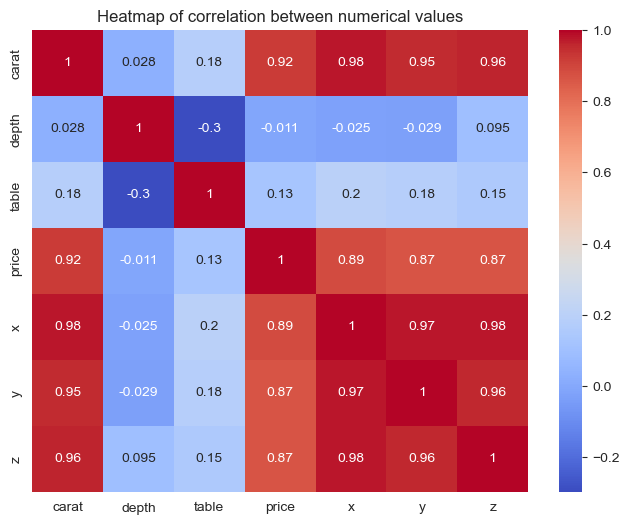

In [44]:
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation between numerical values')
plt.savefig('Heatmap of correlation between numerical values.png', dpi=300)
plt.show()

From the heatmap, we observe that the most strongly correlated factors with diamond price are carat and the physical dimensions (x, y, and z), which means that size and weight are key determinants of price. In contrast, features like depth and table show weak or no significant correlation with price, suggesting they are not major factors in determining a diamond’s value.

In [45]:
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

df['cut_numeric'] = df['cut'].map(cut_mapping)
df['cut_numeric'].unique()

[5, 4, 2, 3, 1]
Categories (5, int64): [5, 4, 3, 2, 1]

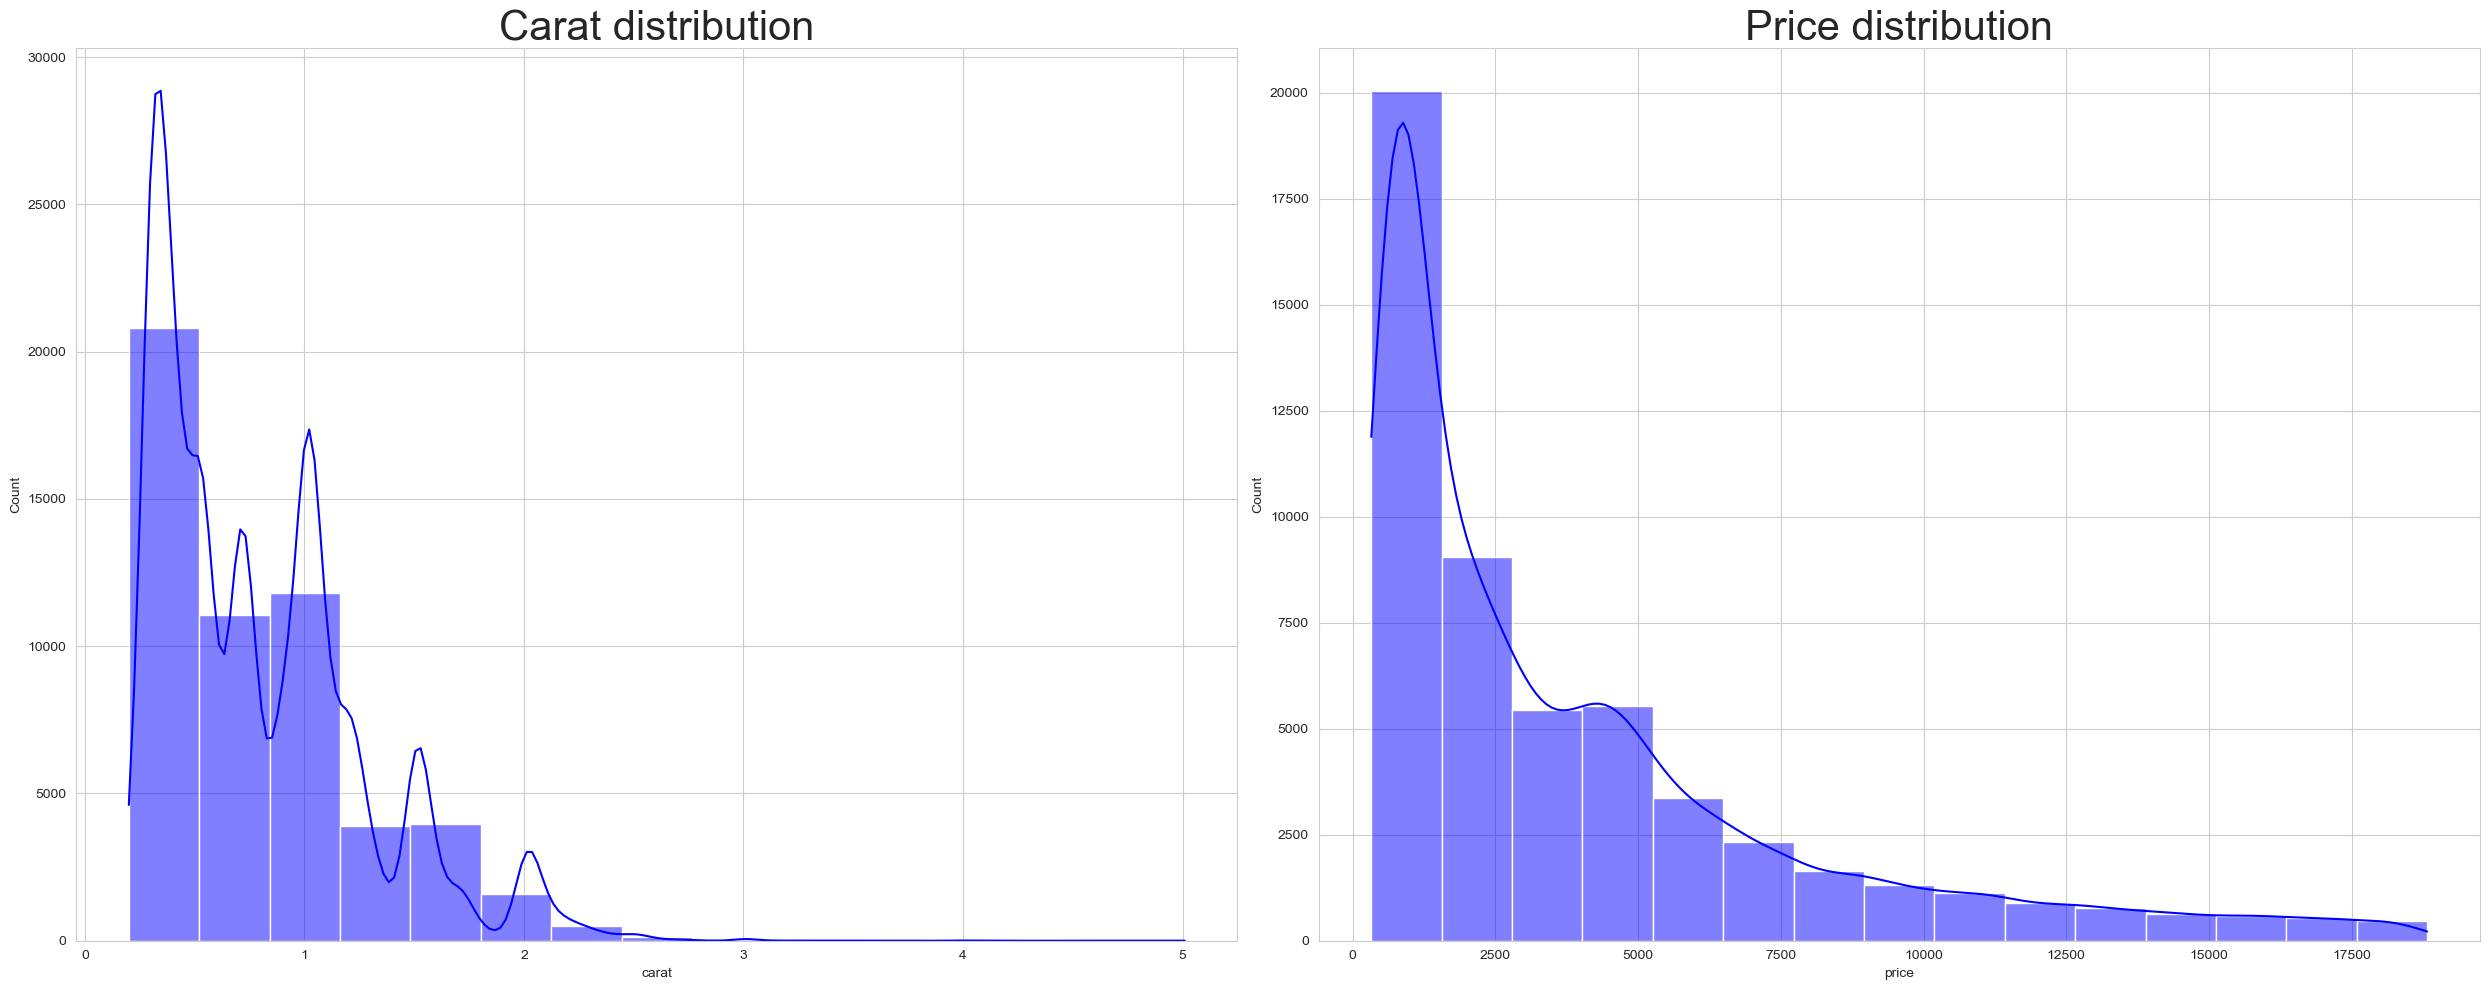

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

sns.histplot(x=df['carat'], ax=axes[0], bins=15, color='blue', kde=True)
axes[0].set_title('Carat distribution', size=30)

sns.histplot(x=df['price'], ax=axes[1], bins=15, color='blue', kde=True)
axes[1].set_title('Price distribution', size=30)

plt.tight_layout()
plt.savefig('Carat and price distributions.png', dpi=300)
plt.show()

From the visualizations, both price and carat distributions are positively skewed. This means that most diamonds in the dataset are affordable and lightweight, with a smaller number of diamonds being very expensive or having higher carat values. The long right tails in both plots indicate that while high-priced and large-carat diamonds exist, they are much less common compared to lower-priced, smaller diamonds.

### *5. Explore how diamond features impact price*

- Carat: Strong positive relationship with price (heavier → pricier).
- x, y, z: Also positively correlated but less than carat.
- Depth and table: Weak or non-linear relationships with price, less impactful.
- Cut: A Better cut does not always mean a higher price (Ideal/Very Good are common and moderately priced).
- Color: Generally, diamonds with color grade D (best) cost more, but other factors interfere.
- Clarity: Higher clarity tends to increase price, but less dramatically than carat.

### *6. State the top three features affecting price*

Feature	Correlation with Price	Explanation
- **Carat** with a correlation coefficient of 0.9215 is the strongest predictor, meaning that heavier diamonds cost significantly more.
- **x (length)** with a correlation coefficient of 0.8871	implies that a larger physical size relates closely to higher prices.
- **z (depth)** with a correlation coefficient of 0.8680, which is also part of the diamond’s size, contributes heavily to value.